https://leetcode.com/problems/word-search-ii/description/?envType=list&envId=xi4ci4ig (ref)

```python
Given an m x n board of characters and a list of strings words, return all words on the board.

Each word must be constructed from letters of sequentially adjacent cells, where adjacent cells are horizontally or vertically neighboring. The same letter cell may not be used more than once in a word.

 

Example 1:


Input: board = [["o","a","a","n"],["e","t","a","e"],["i","h","k","r"],["i","f","l","v"]], words = ["oath","pea","eat","rain"]
Output: ["eat","oath"]
Example 2:


Input: board = [["a","b"],["c","d"]], words = ["abcb"]
Output: []
 

Constraints:

m == board.length
n == board[i].length
1 <= m, n <= 12
board[i][j] is a lowercase English letter.
1 <= words.length <= 3 * 104
1 <= words[i].length <= 10
words[i] consists of lowercase English letters.
All the strings of words are unique.

```

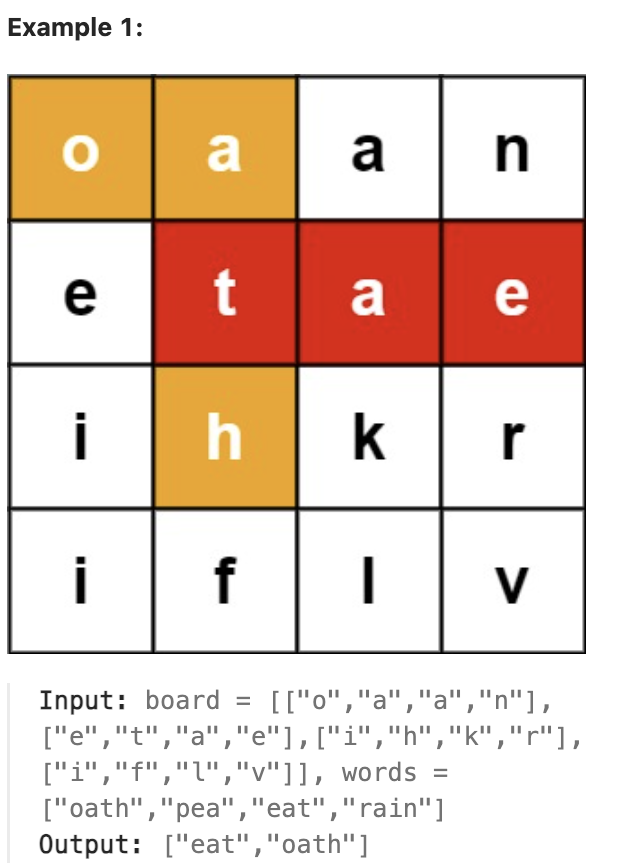

In [5]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.is_word_end = False

def build_tree(words):
    root = TrieNode()

    for word in words:
        node = root
        for ch in word:
            if ch not in node.children:
                node.children[ch] = TrieNode()
            node = node.children[ch]
        node.is_word_end = True

    return root

class Solution:
    def findWords(self, board, words):
        if not board:
            return []

        def dfs(node, i, j, path, visited):
            if node.is_word_end:
                result.add(path)
                node.is_word_end = False
            
            visited.add((i, j))

            directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
            for dx, dy in directions:
                ni, nj = i+dx, j+dy
                if 0 <= ni < m and 0 <= nj < n and (ni, nj) not in visited:
                    next_char = board[ni][nj]
                    if next_char in node.children:
                        dfs(node.children[next_char], ni, nj, path+next_char, visited.copy())

        m, n = len(board), len(board[0])
        trie = build_tree(words)
        result = set()

        for i in range(m):
            for j in range(n):
                start_char = board[i][j]
                if start_char in trie.children:
                    dfs(trie.children[start_char], i , j, start_char, set())
        
        return list(result)